### Упр. - Введение в машинное обучение
- Выберите задачу из реальной жизни, которую можно решить с помощью машинного обучения.
- Определите тип задачи (регрессия, классификация и т. д.) и опишите данные, которые вам понадобятся.

#### Ответ:
Определение практической емкости аккумулятора по габаритам, внутреннему сопротивлению, материалам электродов, электролиту.
Можно решить с помощью линейной регрессии и набора данных, в котором уже известно влияние различных параметров на емкость аккумулятора.

### Практика - Прогнозирование продаж
Предсказание объема продаж компании на основе данных о расходах на рекламу, количестве торговых точек и других факторах. 

#### Задание

- Реализуйте линейную регрессию на языке Python , используя библиотеку scikit-learn
- Убедитесь, что у вас установлен Python и необходимые библиотеки. Вы можете установить их с помощью `pip install pandas scikit-learn`.
```
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
```
- Загружаем данные (замените 'data.csv' на имя вашего файла)
```
data = pd.read_csv('data.csv')
```
- Определяем независимые переменные (признаки) и зависимую переменную (целевая)
```
#Предположим, что 'Sales' - это объем продаж, а остальные столбцы - признаки
X = data.drop('Sales', axis=1)
y = data['Sales']
```
- Разделяем данные на обучающую (70%) и тестовую (30%) выборки
```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
```
- Создаем модель линейной регрессии
```
model = LinearRegression()
```
- Обучаем модель на обучающих данных
```
model.fit(X_train, y_train)
```
- Делаем предсказания на тестовых данных
```
y_pred = model.predict(X_test)
```
- Оцениваем качество модели
```
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)
```
- Выводим результаты
```
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-квадрат: {r2}")

```
- Дополнительная информация: выводим коэффициенты модели
```
print(f"Коэффициенты: {model.coef_}")
print(f"Свободный член: {model.intercept_}")
```


#### Пояснения:

- Импорт библиотек: Импортируем необходимые библиотеки: pandas для работы с данными, train_test_split для разделения данных, LinearRegression для создания модели, mean_squared_error и r2_score для оценки качества.
- Загрузка данных: Загружаем данные из CSV-файла (предполагается, что у вас есть файл data.csv). Важно: замените 'data.csv' на реальное имя вашего файла.
- Определение признаков и целевой переменной: Указываем, какие столбцы в данных являются признаками (X) и какой столбец - целевой переменной (y).
- Разделение данных: Разделяем данные на обучающую и тестовую выборки в соотношении 70/30. random_state=42 используется для воспроизводимости результатов.
- Создание и обучение модели: Создаем экземпляр класса LinearRegression и обучаем его на обучающих данных с помощью метода fit().
- Предсказания: Делаем предсказания на тестовых данных с помощью метода predict().
- Оценка качества: Вычисляем MSE, RMSE и R-квадрат, сравнивая предсказанные значения (ypred) с фактическими (ytest).
- Вывод результатов: Выводим значения метрик и коэффициентов модели.

#### Решение

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Загружаем данные 
data = pd.read_csv('bikes.csv')

#Подготовка данных: удаление ненужных атрибутов, преобразование категориальных данных с помощью one-hot-encoding
df = pd.get_dummies(data)
df = df.drop(['order.id','price.extended'],axis=1)
df.head()

,order.line,year,latitude,longitude,quantity,price,order.date_2011-01-07 00:00:00,order.date_2011-01-10 00:00:00,order.date_2011-01-11 00:00:00,order.date_2011-01-12 00:00:00,...,category2_Cyclocross,category2_Elite Road,category2_Endurance Road,category2_Fat Bike,category2_Over Mountain,category2_Sport,category2_Trail,category2_Triathalon,frame_Aluminum,frame_Carbon
0,1,2011,42.443961,-76.501881,1,6070,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,2,2011,42.443961,-76.501881,1,5970,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,1,2011,39.114053,-94.627464,1,2770,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
3,2,2011,39.114053,-94.627464,1,5970,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
4,1,2011,38.252665,-85.758456,1,10660,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True


In [59]:
#Предположим, что 'quantity' - это объем продаж, а остальные столбцы - признаки

X = df.drop('quantity', axis=1)
y = df['quantity']

#Разделяем данные на обучающую (70%) и тестовую (30%) выборки и вводим значение в random_state, чтобы потом можно было вернуться к этому разбиению
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#Создаем модель линейной регрессии
model = LinearRegression()

#Обучаем модель на обучающих данных
model.fit(X_train, y_train)

#Делаем предсказания на тестовых данных
y_pred = model.predict(X_test)


#Оцениваем качество модели
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

#Выводим результаты
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-квадрат: {r2}")

#Дополнительная информация: выводим коэффициенты модели
print(f"Коэффициенты: {model.coef_}")
print(f"Свободный член: {model.intercept_}")

MSE: 0.8563481658106475
RMSE: 0.9253908178767756
R-квадрат: -0.1256259544507008
Коэффициенты: [ 0.00083323 -0.02087109 -0.0035843  ...  0.05595582  0.01069266
 -0.01069266]
Свободный член: 43.63873635229706


### Практика - Диагностика заболеваний
Классификация пациентов на больных и здоровых на основе результатов медицинских анализов.


#### Задание

Убедитесь, что в ваших данных есть бинарная целевая переменная (0/1) для диагноза.
Убедитесь, что у вас установлен Python и необходимые библиотеки. Вы можете установить их с помощью `pip install pandas scikit-learn`.
```
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
```


- Загружаем данные (замените 'medical_data.csv' на имя вашего файла)
```
data = pd.read_csv('medical_data.csv')
```
- Определяем независимые переменные (признаки) и зависимую переменную (целевая)
```
# Предположим, что 'Diagnosis' - диагноз (0 - здоров, 1 - болен), а остальные столбцы - признаки
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']
```
- Разделяем данные на обучающую (70%) и тестовую (30%) выборки
```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
```
- Создаем модель логистической регрессии
```
model = LogisticRegression()
```
- Обучаем модель на обучающих данных
```
model.fit(X_train, y_train)
```
- Делаем предсказания на тестовых данных
```
y_pred = model.predict(X_test)
```
- Оцениваем качество модели
```
print("Точность:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Полнота:", recall_score(y_test, y_pred))
print("F-мера:", f1_score(y_test, y_pred))
```
- Строим матрицу ошибок
```
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred))
```
- Строим ROC-кривую и вычисляем AUC
```
y_probs = model.predict_proba(X_test)[:, 1]  # Вероятности для класса 1
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()
```





#### Пояснения:

- Импорт библиотек: Импортируем все необходимые библиотеки, включая matplotlib.pyplot для построения графиков.
- Загрузка и подготовка данных: Аналогично примеру с линейной регрессией, загружаем данные, определяем признаки и целевую переменную, делим данные на обучающую и тестовую выборки.
- Создание и обучение модели: Создаем экземпляр LogisticRegression и обучаем его на данных.
- Предсказания: Получаем предсказания для тестовой выборки.
- Оценка качества:
  - Вычисляем точность, полноту, F-меру и выводим их.
  - Строим и выводим матрицу ошибок.
- ROC-кривая и AUC:
  - Вычисляем вероятности для класса 1 (`y_probs`).
  - Используем roc_curve для получения значений FPR, TPR и порогов.
  - Вычисляем AUC с помощью `auc`.
  - Строим ROC-кривую с помощью matplotlib.

#### Решение

In [166]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
pd.set_option('future.no_silent_downcasting', True) #Чтобы установить новые правила для replace

#Загружаем данные
data_med = pd.read_csv('healthcare_dataset.csv')

#Разбираемся с типами данных
data_med = data_med.astype({'Date of Admission':'datetime64[ns]', 'Discharge Date':'datetime64[ns]'})

#Создаем новый параметр на основе двух других: 'Date of Admission' и 'Discharge Date'. Преобразуем в число дней float64
data_med['Days'] = data_med['Discharge Date'] - data_med['Date of Admission']
data_med = data_med.astype({'Days':'int64'})
data_med['Days'] = data_med['Days']/(1000000000*60*60*24)

#Убираем лишние для нашей модели столбцы
data_med = data_med.drop(['Name','Date of Admission','Discharge Date', 'Doctor',
                          'Insurance Provider', 'Hospital','Room Number', 'Medication','Blood Type'], axis=1)

#Создаем словарь для замены категориальных значений числовыми
#data_med['Medication'].unique()
change_dict = {
    'Test Results':{'Normal':0, 'Inconclusive':1, 'Abnormal':1},
    'Gender':{'Male':0, 'Female':1},
    'Medical Condition':{'Cancer':0, 'Obesity':1, 'Diabetes':2, 'Asthma':3, 'Hypertension':4, 'Arthritis':5},
    'Admission Type':{'Urgent':0, 'Emergency':1, 'Elective':2}
}
data_med = data_med.replace(change_dict)
data_med = data_med.astype({'Gender':'int64','Medical Condition':'int64',
                            'Admission Type':'int64','Test Results':'int64'})

#Z-стандартизация для 'Billing Amount'
data_med['Billing Amount'] = (data_med['Billing Amount'] - data_med['Billing Amount'].mean()) / data_med['Billing Amount'].std()

#data_med.dtypes
data_med.head()

,Age,Gender,Medical Condition,Billing Amount,Admission Type,Test Results,Days
0,30,0,0,-0.470257,0,0,2.0
1,62,0,1,0.570245,1,1,6.0
2,76,1,1,0.169988,1,0,15.0
3,28,1,2,0.870457,2,1,30.0
4,43,1,0,-0.795203,0,1,20.0


In [167]:
data_med.isnull().sum()

Age                  0
Gender               0
Medical Condition    0
Billing Amount       0
Admission Type       0
Test Results         0
Days                 0
dtype: int64

In [169]:
correlation_matrix = data_med.corr()
print(correlation_matrix)

                        Age    Gender  Medical Condition  Billing Amount  \
Age                1.000000  0.002002           0.003876       -0.003832   
Gender             0.002002  1.000000           0.001351       -0.004827   
Medical Condition  0.003876  0.001351           1.000000        0.002548   
Billing Amount    -0.003832 -0.004827           0.002548        1.000000   
Admission Type    -0.004775  0.009967           0.001626        0.002448   
Test Results       0.008092  0.005999          -0.001315        0.004116   
Days               0.008220 -0.003836           0.002048       -0.005602   

                   Admission Type  Test Results      Days  
Age                     -0.004775      0.008092  0.008220  
Gender                   0.009967      0.005999 -0.003836  
Medical Condition        0.001626     -0.001315  0.002048  
Billing Amount           0.002448      0.004116 -0.005602  
Admission Type           1.000000     -0.002083  0.005540  
Test Results            -0.0020

Точность: 0.6643243243243243
Precision: 0.6643243243243243
Полнота: 1.0
F-мера: 0.7983111399805132
Матрица ошибок:
[[    0  5589]
 [    0 11061]]


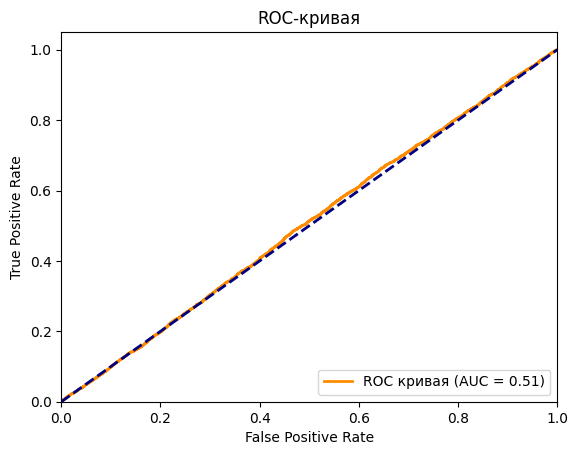

In [168]:
# Предположим, что 'Test Results' - диагноз (0 - здоров, 1 - болен), а остальные столбцы - признаки
X = data_med.drop(['Test Results'], axis=1)
y = data_med['Test Results']

#Разделяем данные на обучающую (70%) и тестовую (30%) выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#Создаем модель логистической регрессии
model_med = LogisticRegression(max_iter=10000)

#Обучаем модель на обучающих данных
model_med.fit(X_train, y_train)

#Делаем предсказания на тестовых данных
y_pred = model_med.predict(X_test)


#Оцениваем качество модели
print("Точность:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Полнота:", recall_score(y_test, y_pred))
print("F-мера:", f1_score(y_test, y_pred))

#Строим матрицу ошибок
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred))

#Строим ROC-кривую и вычисляем AUC
y_probs = model_med.predict_proba(X_test)[:, 1]  # Вероятности для класса 1
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

### Практика - Заполнение пропущенных значений
Замена пропущенных значений в столбце "Возраст" средним значением возраста. 



#### Задание

- Адаптируйте этот код под свои данные: укажите правильные имена столбцов, типы признаков (числовые, категориальные) и выберите подходящую модель 
(линейная или логистическая).
- Проанализируйте результаты: сравните MSE или accuracy с результатами модели без предобработки данных, чтобы оценить его влияние.
```
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
```
1. Загрузка и подготовка данных (замените 'data.csv' на имя вашего файла)
```
data = pd.read_csv('data.csv')
```
2. Разделение на признаки и целевую переменную
```
# Предположим, что 'target' - целевая переменная
X = data.drop('target', axis=1)
y = data['target']
```
3. Разделение на обучающую и тестовую выборки
```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```
4. Создание конвейера предобработки данных

   4.1. Числовые признаки
```
numeric_features = ['Age', 'feature2', 'feature3']  # Замените на имена ваших числовых признаков
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Заполнение пропущенных значений средним
    ('scaler', StandardScaler())  # Стандартизация
])
```
    4.2. Категориальные признаки (если есть)
```
categorical_features = ['feature4', 'feature5'] # Замените на имена ваших категориальных признаков
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Заполнение наиболее частым значением
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot кодирование
])
```
    4.3. Объединение преобразователей
```
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
```
5. Создание конвейера модели (линейная или логистическая регрессия)

   5.1.  Линейная регрессия
```
model_pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
```
    5.2.  Логистическая регрессия
```
model_pipeline_logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])
```
6. Обучение и оценка моделей

   6.1. Линейная регрессия
```
model_lr = model_pipeline_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"MSE (Линейная регрессия): {mse_lr}")
```
    6.2. Логистическая регрессия
```
model_logreg = model_pipeline_logreg.fit(X_train, y_train)
y_pred_logreg = model_logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy (Логистическая регрессия): {accuracy_logreg}")
```



#### Пояснения:

- Загрузка и подготовка данных: Замените 'data.csv' на имя вашего файла и укажите правильные имена столбцов для признаков и целевой переменной.
- Разделение на признаки и целевую переменную: Указываем, какие столбцы использовать для признаков и целевой переменной.
- Разделение на обучающую и тестовую выборки: Делим данные на две части: для обучения и для оценки модели.
- Создание конвейера предобработки:
  - Определяем числовые и категориальные признаки.
  - Создаем конвейеры Pipeline для обработки каждого типа признаков.
  - Используем ColumnTransformer для объединения преобразователей в один.
- Создание конвейера модели: Создаем конвейеры, которые сначала применяют предобработку данных, а затем обучают модель (линейную или логистическую регрессию).
- Обучение и оценка моделей:
  - Обучаем обе модели с помощью fit().
  - Делаем предсказания на тестовых данных.
  - Вычисляем и выводим метрики качества (MSE для линейной регрессии и accuracy для логистической).

#### Решение
Без стандартизации работает лучше, но без преобразования категориальных переменных не работает вообще

In [217]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#1. Загрузка и подготовка данных (замените 'data.csv' на имя вашего файла)
data = pd.read_csv('insurance.csv')

#2. Разделение на признаки и целевую переменную
X = data.drop('charges', axis=1)
y = data['charges']

#3. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#4. Создание конвейера предобработки данных
#4.1. Числовые признаки
numeric_features = ['age', 'bmi']
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),  # Заполнение пропущенных значений средним
                                      ('scaler', StandardScaler())  # Стандартизация
])

#4.2. Категориальные признаки (если есть)
categorical_features = ['sex', 'smoker','region'] # Замените на имена ваших категориальных признаков
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Заполнение наиболее частым значением
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot кодирование
])
#4.3. Объединение преобразователей
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                               ('cat', categorical_transformer, categorical_features)])

#5. Создание конвейера модели (линейная регрессия)
model_pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),('model', LinearRegression())])

#6. Обучение и оценка моделей
model_lr = model_pipeline_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"MSE (Линейная регрессия): {mse_lr}")

MSE (Линейная регрессия): 34243197.66272362


In [219]:
#1. Загрузка и подготовка данных (замените 'data.csv' на имя вашего файла)
data = pd.read_csv('insurance.csv')
data = pd.get_dummies(data)
#2. Разделение на признаки и целевую переменную
X = data.drop('charges', axis=1)
y = data['charges']

#3. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#4. Обучение и оценка модели
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE (Линейная регрессия): {mse}")

MSE (Линейная регрессия): 33780509.574791625


### Практика - Масштабирование признаков (ОБЪЕДИНЕНЫ, ПОСКОЛЬКУ ЭТО, ВИДИМО, ОДНО И ТО ЖЕ ЗАДАНИЕ)
- Приведение значений признаков к одному диапазону, например, от 0 до 1.

- Замените 'data.csv', 'target', 'Age', 'feature2', 'feature3', 'feature4', 'feature5' на реальные имена файла и столбцов в ваших данных.

- Обратите внимание на результаты: в некоторых случаях масштабирование признаков может значительно улучшить качество модели, особенно для алгоритмов, чувствительных к масштабу признаков (например, линейные модели, k-ближайших соседей).
### Практика- Заполнение пропущенных значений

#### Задание

```
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
```
- Загрузка и подготовка данных (замените 'data.csv' на имя вашего файла)
```
data = pd.read_csv('data.csv')
```
- Разделение на признаки и целевую переменную
```
#Предположим, что 'target' - целевая переменная
X = data.drop('target', axis=1)
y = data['target']
```
- Разделение на обучающую и тестовую выборки `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)`
- Создание конвейера предобработки данных
  - Числовые признаки
```
numeric_features = ['Age', 'feature2', 'feature3']  # Замените на имена ваших числовых признаков
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Заполнение пропущенных значений средним
    ('scaler', MinMaxScaler())  # Масштабирование в диапазон [0, 1]
])
```
  - Категориальные признаки (если есть)
```
categorical_features = ['feature4', 'feature5']  # Замените на имена ваших категориальных признаков
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Заполнение наиболее частым значением
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot кодирование
])
```
  - Объединение преобразователей
`preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])`
- Создание конвейера модели (линейная или логистическая регрессия)
    - Линейная регрессия `model_pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),('model', LinearRegression())])`
    - Логистическая регрессия `model_pipeline_logreg = Pipeline(steps=[('preprocessor', preprocessor),('model', LogisticRegression())])`
- Обучение и оценка моделей

  - Линейная регрессия - обучение и оценка

- - - На необработанных данных
```
model_lr_no_preprocessing = LinearRegression()
model_lr_no_preprocessing.fit(X_train, y_train)
y_pred_lr_no_preprocessing = model_lr_no_preprocessing.predict(X_test)
mse_lr_no_preprocessing = mean_squared_error(y_test, y_pred_lr_no_preprocessing)
print(f"MSE (Линейная регрессия без обработки): {mse_lr_no_preprocessing}")
```
- - - На обработанных данных
```
model_lr = model_pipeline_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"MSE (Линейная регрессия с обработкой): {mse_lr}")
```
  - Логистическая регрессия - обучение и оценка
- - - На необработанных данных
```
model_logreg_no_preprocessing = LogisticRegression()
model_logreg_no_preprocessing.fit(X_train, y_train)
y_pred_logreg_no_preprocessing = model_logreg_no_preprocessing.predict(X_test)
accuracy_logreg_no_preprocessing = accuracy_score(y_test, y_pred_logreg_no_preprocessing)
print(f"Accuracy (Логистическая регрессия без обработки): {accuracy_logreg_no_preprocessing}")
```
- - - На обработанных данных
```
model_logreg = model_pipeline_logreg.fit(X_train, y_train)
y_pred_logreg = model_logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy (Логистическая регрессия с обработкой): {accuracy_logreg}")
```


#### Пояснения:



- Загрузка и подготовка данных: Аналогично предыдущему примеру.
- Разделение на признаки и целевую переменную: Аналогично предыдущему примеру.
- Разделение на обучающую и тестовую выборки: Аналогично предыдущему примеру.
- Создание конвейера предобработки:
   - Используем MinMaxScaler() для масштабирования числовых признаков в диапазон 0, 1.
   - Остальные шаги аналогичны предыдущему примеру.
- Создание конвейера модели: Аналогично предыдущему примеру.
- Обучение и оценка моделей:
   - Обучаем модели с предобработкой и без предобработки данных.
   - Оцениваем качество моделей на тестовых данных, используя соответствующие метрики (MSE для линейной регрессии и accuracy для логистической).
   - Сравниваем метрики для моделей с предобработкой и без нее, чтобы оценить влияние масштабирования признаков.

#### Решение

In [224]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#1. Загрузка и подготовка данных (замените 'data.csv' на имя вашего файла)
data = pd.read_csv('insurance.csv')

#2. Разделение на признаки и целевую переменную
X = data.drop('charges', axis=1)
y = data['charges']

#3. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#4. Создание конвейера предобработки данных
#4.1. Числовые признаки
numeric_features = ['age', 'bmi']
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),  # Заполнение пропущенных значений средним
                                      ('scaler', MinMaxScaler())  # Масштабирование в диапазон [0, 1]
])

#4.2. Категориальные признаки (если есть)
categorical_features = ['sex', 'smoker','region'] # Замените на имена ваших категориальных признаков
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Заполнение наиболее частым значением
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot кодирование
])
#4.3. Объединение преобразователей
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                               ('cat', categorical_transformer, categorical_features)])

#5. Создание конвейера модели (линейная регрессия)
model_pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),('model', LinearRegression())])

#Линейная регрессия - обучение и оценка
#На необработанных данных
X_train1 = X_train.drop(['sex','smoker', 'region'],axis=1)
X_test1 = X_test.drop(['sex','smoker', 'region'],axis=1)
model_lr_no_preprocessing = LinearRegression()
model_lr_no_preprocessing.fit(X_train1, y_train)
y_pred_lr_no_preprocessing = model_lr_no_preprocessing.predict(X_test1)
mse_lr_no_preprocessing = mean_squared_error(y_test, y_pred_lr_no_preprocessing)
print(f"MSE (Линейная регрессия без обработки): {mse_lr_no_preprocessing}")

#На обработанных данных
model_lr = model_pipeline_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"MSE (Линейная регрессия с обработкой): {mse_lr}")


MSE (Линейная регрессия без обработки): 127399626.37416688
MSE (Линейная регрессия с обработкой): 34243197.66272362


### Практика - Сравнение моделей
Использование метрик качества для сравнения производительности различных моделей машинного обучения.

#### Задание

- Выбор солвера: Экспериментируйте с разными солверами для логистической регрессии, чтобы найти наиболее подходящий для ваших данных.
- Визуализация результатов: Визуализируйте результаты сравнения моделей (например, с помощью боксплотов для кросс-валидации или ROC-кривых для классификации), чтобы сделать вывод более наглядным.
```
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, make_scorer
```


- Загрузка и подготовка данных (замените 'data.csv' на имя вашего файла)

```
data = pd.read_csv('data.csv')
```



- Разделение на признаки и целевую переменную


```
# Предположим, что 'target' - целевая переменная
X = data.drop('target', axis=1)
y = data['target']
```


- Разделение на обучающую и тестовую выборки

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```



- Определение моделей и гиперпараметров для перебора


```
models = [
    {
        'name': 'Linear Regression',
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False]
        }
    },
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(),
        'params': {
            'penalty': ['l1', 'l2'],
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'saga']  # Добавлено несколько вариантов солверов
        }
    }
]
```


- Перекрестная проверка и оценка моделей
```
results = []
for model_config in models:
    print(f"Оценка модели: {model_config['name']}")

    # Определение метрики качества
    if model_config['name'] == 'Linear Regression':
        scoring = 'neg_mean_squared_error' # Используем встроенный негативный MSE
    else:
        scoring = 'accuracy'

    # GridSearchCV для перебора гиперпараметров и кросс-валидации
    grid_search = GridSearchCV(
        estimator=model_config['model'],
        param_grid=model_config['params'],
        scoring=scoring,
        cv=5,  # 5-fold cross-validation
        n_jobs=-1  # Использовать все доступные ядра процессора
    )
    grid_search.fit(X_train, y_train)

    # Сохранение результатов
    results.append({
        'model': model_config['name'],
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'best_estimator': grid_search.best_estimator_
    })

    # Вывод результатов
    print(f"Лучшие параметры: {grid_search.best_params_}")
    print(f"Лучший результат (кросс-валидация): {grid_search.best_score_}")
    print("-" * 30)
```


- Выбор лучшей модели (сравнение результатов)
```
best_model = max(results, key=lambda x: x['best_score'])

print("Лучшая модель:")
print(f"Модель: {best_model['model']}")
print(f"Параметры: {best_model['best_params']}")
print(f"Результат: {best_model['best_score']}")

# Оценка на тестовой выборке
best_estimator = best_model['best_estimator']
y_pred = best_estimator.predict(X_test)


if best_model['model'] == 'Linear Regression':
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE (тестовая выборка): {mse}")
else:
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy (тестовая выборка): {accuracy}")
```





#### Улучшения:

- Солверы для логистической регрессии: Добавлены различные варианты солверов (`'liblinear'`, `'saga'`) в параметры `LogisticRegression`. Выбор солвера может влиять на скорость и сходимость алгоритма, особенно для разных типов данных и штрафов.
- Использование встроенных scorer-ов:  Используем встроенные названия scorer-ов  ('neg_mean_squared_error' для MSE и 'accuracy' для точности) вместо создания собственных с помощью make_scorer.
- Сохранение результатов:  Сохраняем результаты кросс-валидации и лучшие модели в списке `results` для удобства сравнения и выбора лучшей модели.
- Автоматический выбор лучшей модели:  Используем max с функцией lambda для автоматического выбора модели с наибольшим значением best_score из списка results

#### Решение

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, make_scorer

pd.set_option('future.no_silent_downcasting', True)

#Загружаем данные
data_med = pd.read_csv('healthcare_dataset.csv')

#Разбираемся с типами данных
data_med = data_med.astype({'Date of Admission':'datetime64[ns]', 'Discharge Date':'datetime64[ns]'})

#Создаем новый параметр на основе двух других: 'Date of Admission' и 'Discharge Date'. Преобразуем в число дней float64
data_med['Days'] = data_med['Discharge Date'] - data_med['Date of Admission']
data_med = data_med.astype({'Days':'int64'})
data_med['Days'] = data_med['Days']/(1000000000*60*60*24)

#Убираем лишние для нашей модели столбцы
data_med = data_med.drop(['Name','Date of Admission','Discharge Date', 'Doctor',
                          'Insurance Provider', 'Hospital','Room Number', 'Medication','Blood Type'], axis=1)

#Создаем словарь для замены категориальных значений числовыми
#data_med['Medication'].unique()
change_dict = {
    'Test Results':{'Normal':0, 'Inconclusive':1, 'Abnormal':1},
    'Gender':{'Male':0, 'Female':1},
    'Medical Condition':{'Cancer':0, 'Obesity':1, 'Diabetes':2, 'Asthma':3, 'Hypertension':4, 'Arthritis':5},
    'Admission Type':{'Urgent':0, 'Emergency':1, 'Elective':2}
}
data_med = data_med.replace(change_dict)
data_med = data_med.astype({'Gender':'int64','Medical Condition':'int64',
                            'Admission Type':'int64','Test Results':'int64'})

#Z-стандартизация для 'Billing Amount'
data_med['Billing Amount'] = (data_med['Billing Amount'] - data_med['Billing Amount'].mean()) / data_med['Billing Amount'].std()


# Предположим, что 'Test Results' - целевая переменная
X = data_med.drop('Test Results', axis=1)
y = data_med['Test Results']


#Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Определение моделей и гиперпараметров для перебора
models = [
    {
        'name': 'Linear Regression',
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False]
        }
    },
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(),
        'params': {
            'penalty': ['l1', 'l2'],
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'saga']  # Добавлено несколько вариантов солверов
        }
    }
]

#Перекрестная проверка и оценка моделей
results = []

for model_config in models:
    print(f"Оценка модели: {model_config['name']}")

    # Определение метрики качества
    if model_config['name'] == 'Linear Regression':
        scoring = 'neg_mean_squared_error' # Используем встроенный негативный MSE
    else:
        scoring = 'accuracy'

    # GridSearchCV для перебора гиперпараметров и кросс-валидации
    grid_search = GridSearchCV(
        estimator=model_config['model'],
        param_grid=model_config['params'],
        scoring=scoring,
        cv=5,  # 5-fold cross-validation
        n_jobs=-1  # Использовать все доступные ядра процессора
    )
    grid_search.fit(X_train, y_train)

    # Сохранение результатов
    results.append({
        'model': model_config['name'],
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'best_estimator': grid_search.best_estimator_
    })

    # Вывод результатов
    print(f"Лучшие параметры: {grid_search.best_params_}")
    print(f"Лучший результат (кросс-валидация): {grid_search.best_score_}")
    print("-" * 30)

Оценка модели: Linear Regression
Лучшие параметры: {'fit_intercept': True}
Лучший результат (кросс-валидация): -0.22217904628106347
------------------------------
Оценка модели: Logistic Regression
Лучшие параметры: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Лучший результат (кросс-валидация): 0.666936936936937
------------------------------


### Практика - Выбор гиперпараметров 
Оптимизация гиперпараметров модели с помощью перекрестной проверки

#### Задание

- Импорт необходимых библиотек
```
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
```
- Загрузка и подготовка данных

    В этом примере мы будем использовать набор данных Iris из scikit-learn.
```
# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```
- Создание модели и определение сетки гиперпараметров

    Создадим модель SVM (Support Vector Machine) и определим сетку гиперпараметров, которые мы хотим оптимизировать.
```
# Создание модели SVM
model = SVC()

# Определение сетки гиперпараметров
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.1, 1],
              'kernel': ['linear', 'rbf']}
```
- Оптимизация гиперпараметров с помощью GridSearchCV

    Используем GridSearchCV для поиска наилучшей комбинации гиперпараметров из заданной сетки с использованием перекрестной проверки.
```
# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Подгонка модели на обучающих данных
grid_search.fit(X_train, y_train)

# Вывод лучших гиперпараметров
print("Лучшие гиперпараметры:", grid_search.best_params_)
```
- Оценка модели с лучшими гиперпараметрами

    Получим лучшую модель из GridSearchCV и оценим ее производительность на тестовом наборе данных.
```
# Получение лучшей модели
best_model = grid_search.best_estimator_

# Предсказание на тестовом наборе данных
y_pred = best_model.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Точность на тестовом наборе:", accuracy)
```


#### Дополнительные замечания:


- Вы можете использовать другие метрики оценки, отличные от точности, в зависимости от задачи.
- Вы можете использовать другие методы поиска гиперпараметров, такие как RandomizedSearchCV.
- Важно настроить параметры перекрестной проверки (cv) в соответствии с размером вашего набора данных.
- Процесс поиска гиперпараметров может быть ресурсоемким, поэтому важно оптимизировать код и использовать достаточные вычислительные ресурсы.

#### Решение

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели SVM
model = SVC()

# Определение сетки гиперпараметров
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.1, 1],
              'kernel': ['linear', 'rbf']}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Подгонка модели на обучающих данных
grid_search.fit(X_train, y_train)

# Вывод лучших гиперпараметров
print("Лучшие гиперпараметры:", grid_search.best_params_)

# Получение лучшей модели
best_model = grid_search.best_estimator_

# Предсказание на тестовом наборе данных
y_pred = best_model.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Точность на тестовом наборе:", accuracy)

Лучшие гиперпараметры: {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
Точность на тестовом наборе: 1.0
